# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!

response_data_btc = requests.get(btc_url).json()
current_btc_price = response_data_btc["data"]["1"]["quotes"]["USD"]["price"]
current_btc_price

# Fetch current ETH price
# YOUR CODE HERE!

response_data_eth = requests.get(eth_url).json()
current_eth_price = response_data_eth["data"]["1027"]["quotes"]["USD"]["price"]
current_eth_price


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32652.00
The current value of your 5.3 ETH is $9101.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2023-03-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_portfolio_year = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio_year

SPY                                    \
                              open    high    low   close     volume   
timestamp                                                              
2023-03-24 04:00:00+00:00  391.841  395.84  389.4  395.75  107053295   

                                                      AGG                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2023-03-24 04:00:00+00:00      801995  393.110712  100.28  100.49  99.95   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2023-03-24 04:00:00+00:00  100.16  6203977       23905  100.145648

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio_year ["AGG"]["close"])  
spy_close_price = float(df_portfolio_year ["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.16
Current SPY closing price: $395.75


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 110 SPY shares is $43532.50
The current value of your 200 AGG shares is $20032.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

crypto_wallet = my_btc_value + my_eth_value
stock_bond = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!

savings_data = pd.DataFrame({"amount":[crypto_wallet, stock_bond]}, index = ["crypto", "shares"])

# Display savings DataFrame
savings_data

,amount
crypto,41753.319
shares,63564.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

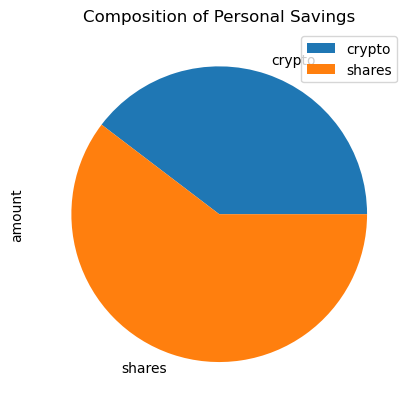

In [12]:


# Plot savings pie chart
# YOUR CODE HERE!

savings_data["amount"].plot(kind = "pie", title = "Composition of Personal Savings", legend= True)

In [13]:
# Set ideal emergency fund
emergency_fund_value = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_portfolio = crypto_wallet + stock_bond 

# Validate saving health
# YOUR CODE HERE!
 
if total_portfolio > emergency_fund_value:
    print( "Congratulations! You have enough money in your emergency fund.")
elif total_portfolio == emergency_fund_value:
    print ("Congratulations! You have reached an important financial goal")
else:
    print(f"You are ${total_portfolio - emergency_fund_value} away from attaining your emergency fund goal")  



Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-26', tz='America/New_York').isoformat()

In [15]:
#added cell
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

ticker = ["AGG", "SPY"]

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()




# Reorganize the DataFrame

ticker_data_df = pd.concat([ticker_data], axis=1, keys=["SPY", "AGG"])

ticker_data_df.head()

# Separate ticker data
# YOUR CODE HERE!
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop(['symbol', 'trade_count', 'vwap'] , axis=1)
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop(['symbol', 'trade_count', 'vwap'], axis=1)

ticker_data_df.head()

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

stock_bond_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
stock_bond_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
timestamp                                                                    
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535  262.13   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884  266.17   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206  260.75   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453  261.12   
2018-04-02 04:00:00+00:00  106.90  107.04  106.82  106.90  7280259  262.55   

                                                                
                             high       low   close     volume  
timestamp                                                       
2018-03-26 04:00:00+00:00  265.43  259.4100  265.14  143141239  
2018-03-27 04:00:00+00:00  266.77  258.8400  260.76  130806695  
2018-03-28 04:00:00+00:00  262.64  258.5800  259.85  146510333  
2018-03-29 04:00:00+00:00  265.26  259.8389  263.43  125470572  
2018-04-02 04:00:00+00:00  263.13  254.6700  257.52  186324337

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty = MCSimulation(
    portfolio_data = stock_bond_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_thirty.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   
2018-04-02 04:00:00+00:00  106.90  107.04  106.82  106.90  7280259   

                                           SPY                            \
                          daily_return    open    high       low   close   
timestamp                                                                  
2018-03-26 04:00:00+00:00          NaN  262.13  265.43  259.4100  265.14   
2018-03-27 04:00:00+00:00     0.002909  266.17  266.77  258.8400  260.76   
2018-03-28 04:00:00+00:00     0.000561  260.75  262.64  258.5800  259.85   
2018-03-29 04:00:00+00:00     0.002899  261.12  265.26  259.8389  263.43   
2018-04-02 04:00:00+00:00    -0.003263  262.55  263.13  254.6700  257.52   

                                                   
                              volume daily_return  
timestamp                                          
2018-03-26 04:00:00+00:00  143141239          NaN  
2018-03-27 04:00:00+00:00  130806695    -0.016520  
2018-03-28 04:00:00+00:00  146510333    -0.003490  
2018-03-29 04:00:00+00:00  125470572     0.013777  
2018-04-02 04:00:00+00:00  186324337    -0.022435

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manuela.nkwinkwa/homework/Monte_Carlo_Simulation/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006362,1.001808,0.996894,1.014308,0.999153,0.997519,0.998030,0.992371,1.002416,1.010935,...,1.006243,0.988674,0.996194,1.002588,0.990439,1.009030,1.005782,1.009037,0.994743,1.004246
2,1.009635,1.014839,1.002012,1.010797,1.004893,1.005454,0.998798,0.985769,1.011229,1.016616,...,1.001970,0.981783,1.002517,0.998436,0.986503,1.007915,1.011319,1.012615,0.994534,1.006657
3,1.016049,1.007366,0.999425,1.009264,1.012872,1.006178,1.000843,0.980440,1.001602,1.015114,...,1.010238,0.986848,1.000077,1.004301,0.981153,1.011009,1.006702,1.003998,1.001404,0.994910
4,1.010482,0.995904,0.998327,1.008707,1.014113,1.006661,0.998313,0.982415,0.998547,1.016115,...,1.009358,0.992257,0.996745,1.010437,0.982745,1.016508,1.005004,0.996079,1.003718,0.994434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.525328,4.387710,2.111199,2.338806,3.506387,2.547313,5.000549,2.483594,3.754989,3.682565,...,2.134724,1.614385,1.457957,1.638596,2.553336,2.074862,3.682724,1.286406,2.464563,1.422325
7557,2.517758,4.352143,2.100734,2.328536,3.490504,2.558243,4.989991,2.492011,3.720141,3.654543,...,2.141843,1.623722,1.453102,1.641890,2.549418,2.060045,3.651416,1.285018,2.450701,1.415059
7558,2.517845,4.367613,2.110750,2.331558,3.465953,2.566873,4.967571,2.483630,3.709714,3.671540,...,2.137194,1.622960,1.454872,1.642324,2.543939,2.064337,3.631253,1.280526,2.430794,1.405236
7559,2.531998,4.383159,2.114653,2.311624,3.478776,2.566212,4.964584,2.497074,3.710218,3.629780,...,2.143017,1.604257,1.465569,1.657611,2.570280,2.062790,3.661742,1.277188,2.416082,1.413610


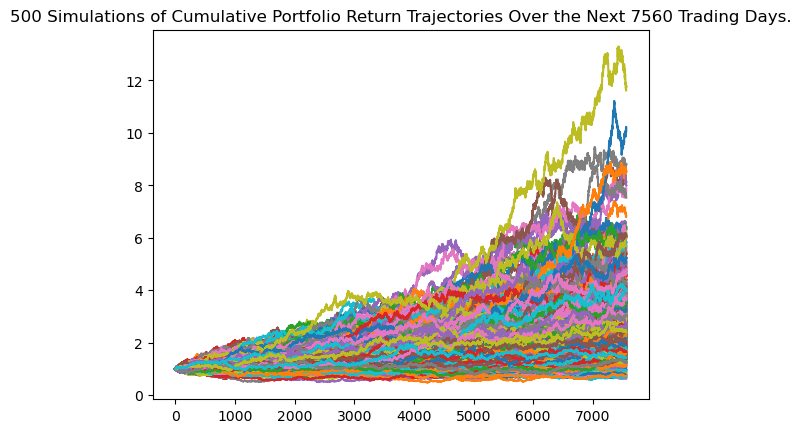

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirty.plot_simulation()


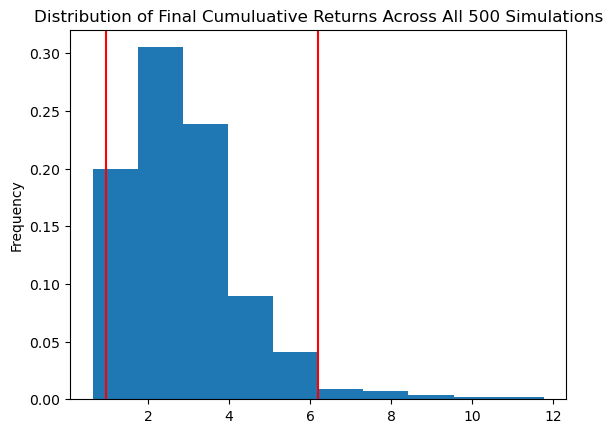

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirty.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_statistics = MC_thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

summary_statistics

count           500.000000
mean              2.878578
std               1.455573
min               0.630412
25%               1.825996
50%               2.588267
75%               3.605412
max              11.770955
95% CI Lower      0.943694
95% CI Upper      6.185849
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(summary_statistics["95% CI Lower"]* initial_investment, 2)

ci_upper = round(summary_statistics["95% CI Upper"]* initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18873.87 and $123716.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(summary_statistics["95% CI Lower"]* initial_investment, 2)

ci_upper = round(summary_statistics["95% CI Upper"]* initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28310.81 and $185575.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_five = MCSimulation(
    portfolio_data = stock_bond_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_five.portfolio_data


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2018-03-26 04:00:00+00:00  106.64  106.71  106.470  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.610  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.880  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.950  107.25  9199453   
2018-04-02 04:00:00+00:00  106.90  107.04  106.820  106.90  7280259   
...                           ...     ...      ...     ...      ...   
2023-03-20 04:00:00+00:00   99.73   99.73   99.015   99.10  6346444   
2023-03-21 04:00:00+00:00   98.88   99.03   98.700   98.80  5499073   
2023-03-22 04:00:00+00:00   98.80   99.82   98.640   99.75  7585382   
2023-03-23 04:00:00+00:00   99.68  100.05   99.510   99.99  9949714   
2023-03-24 04:00:00+00:00  100.28  100.49   99.950  100.16  6203977   

                                            SPY                            \
                          daily_return     open    high       low   close   
timestamp                                                                   
2018-03-26 04:00:00+00:00          NaN  262.130  265.43  259.4100  265.14   
2018-03-27 04:00:00+00:00     0.002909  266.170  266.77  258.8400  260.76   
2018-03-28 04:00:00+00:00     0.000561  260.750  262.64  258.5800  259.85   
2018-03-29 04:00:00+00:00     0.002899  261.120  265.26  259.8389  263.43   
2018-04-02 04:00:00+00:00    -0.003263  262.550  263.13  254.6700  257.52   
...                                ...      ...     ...       ...     ...   
2023-03-20 04:00:00+00:00    -0.004020  390.800  394.17  390.0700  393.74   
2023-03-21 04:00:00+00:00    -0.003027  397.240  399.41  395.5800  398.91   
2023-03-22 04:00:00+00:00     0.009615  398.730  402.49  392.0700  392.11   
2023-03-23 04:00:00+00:00     0.002406  395.090  399.29  390.3500  393.17   
2023-03-24 04:00:00+00:00     0.001700  391.841  395.84  389.4000  395.75   

                                                   
                              volume daily_return  
timestamp                                          
2018-03-26 04:00:00+00:00  143141239          NaN  
2018-03-27 04:00:00+00:00  130806695    -0.016520  
2018-03-28 04:00:00+00:00  146510333    -0.003490  
2018-03-29 04:00:00+00:00  125470572     0.013777  
2018-04-02 04:00:00+00:00  186324337    -0.022435  
...                              ...          ...  
2023-03-20 04:00:00+00:00   93077851     0.009616  
2023-03-21 04:00:00+00:00   91537353     0.013130  
2023-03-22 04:00:00+00:00  111781863    -0.017046  
2023-03-23 04:00:00+00:00  119351319     0.002703  
2023-03-24 04:00:00+00:00  107053295     0.006562  

[1259 rows x 12 columns]

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manuela.nkwinkwa/homework/Monte_Carlo_Simulation/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996611,0.993808,1.003165,0.994486,1.006848,1.000573,0.998069,1.001936,0.996660,1.004155,...,1.001623,1.007663,0.999820,0.982221,0.997959,1.006698,1.001252,1.005806,0.994940,1.000699
2,0.992495,0.999462,1.009521,0.990800,1.012877,0.999349,0.998938,1.011045,0.989815,1.008816,...,1.012050,1.004471,0.998218,0.985920,0.996575,1.006760,0.999510,1.008478,0.996434,0.995151
3,0.990899,0.999012,1.006632,0.979408,1.007901,1.003188,1.003636,1.006714,0.985910,1.004937,...,1.004858,1.012925,1.003807,0.991053,1.004538,0.999838,1.003644,1.010640,0.992199,0.995632
4,0.990268,1.000168,1.008062,0.977618,1.008968,1.004653,1.000512,1.007516,0.982039,1.009191,...,1.002115,1.006848,1.010040,0.988620,0.997936,0.996675,1.008790,1.006927,0.989366,0.990504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.995056,1.403351,0.936955,0.952496,1.069373,1.162875,0.828080,1.397576,1.301245,1.290855,...,0.876731,1.141981,1.125585,1.141671,1.529652,1.157655,1.292393,0.788000,0.860540,1.832595
1257,1.001387,1.410549,0.930138,0.955081,1.071282,1.162100,0.831270,1.401694,1.306595,1.276177,...,0.884266,1.141778,1.134072,1.141293,1.529493,1.157187,1.280057,0.796128,0.858332,1.840134
1258,0.995422,1.394329,0.930533,0.957639,1.063682,1.151400,0.834913,1.408694,1.308514,1.282633,...,0.890354,1.136698,1.135460,1.144032,1.533888,1.157283,1.278827,0.798964,0.853768,1.835627
1259,0.992250,1.392396,0.930074,0.967412,1.064169,1.148786,0.840316,1.407930,1.307836,1.284869,...,0.885369,1.131392,1.127544,1.142102,1.532938,1.162377,1.284281,0.801944,0.848153,1.829761


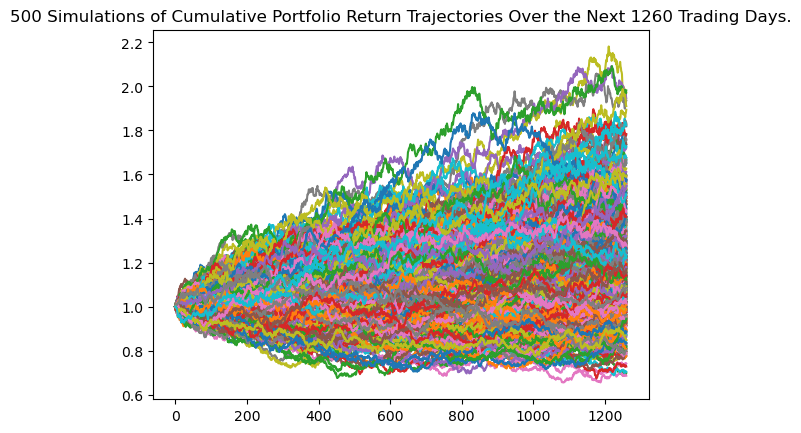

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five.plot_simulation()

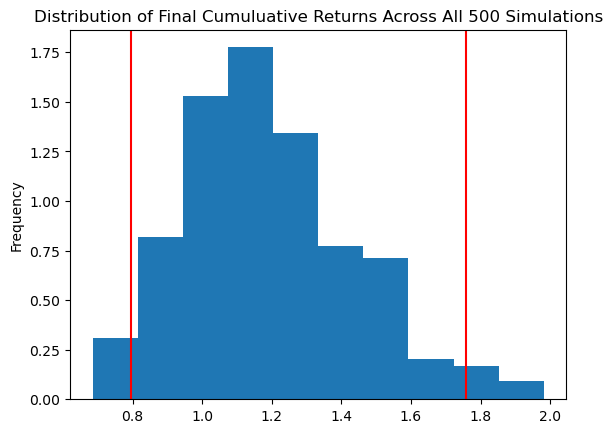

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
fiveyears_statistics = MC_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

fiveyears_statistics

count           500.000000
mean              1.192061
std               0.243997
min               0.685724
25%               1.019181
50%               1.165204
75%               1.338189
max               1.981605
95% CI Lower      0.796222
95% CI Upper      1.757395
Name: 1260, dtype: float64

In [42]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(fiveyears_statistics["95% CI Lower"]* initial_investment, 2)

ci_upper_five = round(fiveyears_statistics["95% CI Upper"]* initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47773.3 and $105443.71


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_ten = MCSimulation(
    portfolio_data = stock_bond_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)



In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manuela.nkwinkwa/homework/Monte_Carlo_Simulation/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989850,0.994546,1.003738,1.004235,1.005894,1.005947,1.001698,0.998923,1.012016,0.995531,...,0.996002,1.007444,1.001549,0.990058,0.999319,0.997424,1.001979,0.998570,1.005739,1.005144
2,0.993026,0.997885,1.004366,1.013426,1.006403,1.001069,1.002000,0.992525,1.012838,1.013986,...,0.992866,1.001740,1.001518,0.999573,0.996291,1.004294,1.002627,0.989901,1.001907,1.003902
3,1.001454,1.004330,1.004219,1.014423,1.001081,1.000172,1.004906,0.996396,1.011727,1.014723,...,1.002835,1.007108,0.997951,0.997184,0.995585,1.005527,1.005953,0.991889,0.999449,1.008937
4,0.996067,1.010114,1.001201,1.031265,1.008240,0.994627,1.007901,0.998656,1.001086,1.026285,...,1.006618,0.997290,0.996297,1.000500,0.993711,1.010844,1.013141,0.995081,1.001790,1.006434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.622577,1.550079,1.343984,1.079219,1.423927,0.896240,1.185177,1.216675,1.649031,1.167242,...,0.892155,0.966463,0.891309,1.069700,1.061924,1.281618,1.231757,1.146753,1.222483,1.567762
1257,1.612305,1.546136,1.348735,1.084995,1.427021,0.898352,1.185234,1.211400,1.648675,1.159691,...,0.895159,0.959095,0.889609,1.074364,1.064018,1.288686,1.235475,1.146896,1.209402,1.577789
1258,1.630544,1.549619,1.352386,1.072745,1.423544,0.894739,1.191069,1.212143,1.654221,1.164156,...,0.893526,0.965785,0.890637,1.071418,1.061339,1.300706,1.242045,1.142635,1.216044,1.584002
1259,1.628972,1.549719,1.350089,1.076284,1.427666,0.907830,1.183429,1.215562,1.661256,1.157750,...,0.898370,0.953867,0.890830,1.075510,1.060160,1.299556,1.234905,1.154793,1.221497,1.587757


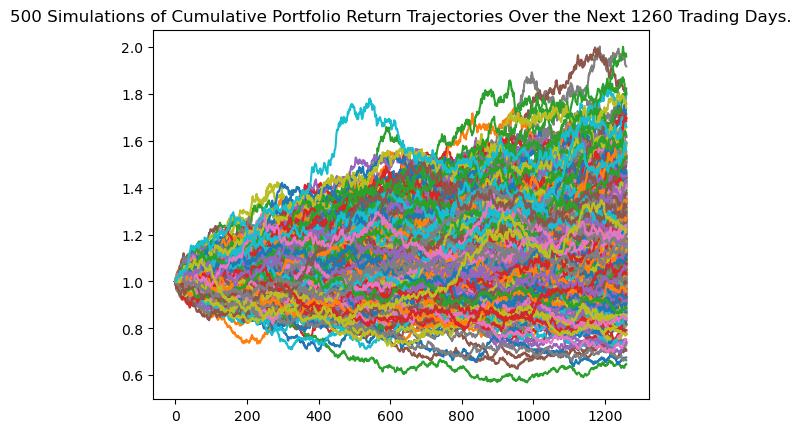

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten.plot_simulation()

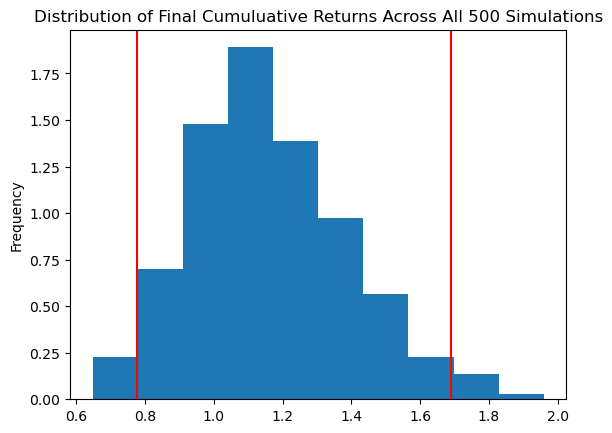

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tenyears_statistics = MC_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
tenyears_statistics

count           500.000000
mean              1.163943
std               0.230411
min               0.647818
25%               0.998436
50%               1.137449
75%               1.304442
max               1.959476
95% CI Lower      0.775396
95% CI Upper      1.688591
Name: 1260, dtype: float64

In [44]:
# Set initial investment
# YOUR CODE HERE!

inintial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tenyears_statistics["95% CI Lower"]* initial_investment, 2)

ci_upper_ten = round(tenyears_statistics["95% CI Upper"]* initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $46523.76 and $101315.48
